In [140]:
# Initial imports
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
%matplotlib inline
from sklearn.preprocessing import StandardScaler

In [141]:
# Read in data, convert date column to datetime format, set date column as index
data = Path("Data/2_deep_learning/data_df.csv")
data_df = pd.read_csv(data)
data_df['date'] = pd.to_datetime(data_df['date'])
data_df = data_df.set_index('date')
data_df.head()

,DJIA,NASDAQ,S&P500,CBOE,GOLD,SILVER,DOLLAR,WTI,10YR,BTC,GDP,CPI,IPI,UNEMP,NFP,IUC,FED
date,,,,,,,,,,,,,,,,,
2016-01-04,17148.94,4903.09,2012.66,20.70,1135.5,14.88,98.87,36.76,2.24,432.9,18382.82,237.80,102.88,4.9,143195.45,276142.86,4.486601e+12
2016-01-05,17158.66,4891.43,2016.71,19.34,1138.4,15.01,99.40,35.97,2.24,431.8,18383.82,237.79,102.86,4.9,143203.94,277714.29,4.486603e+12
2016-01-06,16906.51,4835.77,1990.26,20.59,1151.9,15.00,99.18,33.97,2.17,428.0,18384.82,237.78,102.83,4.9,143212.42,279285.71,4.486606e+12
2016-01-07,16514.10,4689.43,1943.09,24.99,1162.7,15.37,98.22,33.27,2.15,459.0,18385.83,237.77,102.81,4.9,143220.90,280857.14,4.488762e+12
2016-01-08,16346.45,4643.63,1922.03,27.01,1151.7,14.94,98.54,33.16,2.12,454.0,18386.83,237.76,102.79,4.9,143229.39,282428.57,4.490917e+12


In [142]:
# Move BTC column to the end
data_df = data_df[['DJIA', 'NASDAQ', 'S&P500', 'CBOE', 'GOLD', 'SILVER', 'DOLLAR', 'WTI', '10YR', 'GDP', 'CPI', 'IPI', 'UNEMP', 'NFP', 'IUC', 'FED', 'BTC']]
data_df.head()

,DJIA,NASDAQ,S&P500,CBOE,GOLD,SILVER,DOLLAR,WTI,10YR,GDP,CPI,IPI,UNEMP,NFP,IUC,FED,BTC
date,,,,,,,,,,,,,,,,,
2016-01-04,17148.94,4903.09,2012.66,20.70,1135.5,14.88,98.87,36.76,2.24,18382.82,237.80,102.88,4.9,143195.45,276142.86,4.486601e+12,432.9
2016-01-05,17158.66,4891.43,2016.71,19.34,1138.4,15.01,99.40,35.97,2.24,18383.82,237.79,102.86,4.9,143203.94,277714.29,4.486603e+12,431.8
2016-01-06,16906.51,4835.77,1990.26,20.59,1151.9,15.00,99.18,33.97,2.17,18384.82,237.78,102.83,4.9,143212.42,279285.71,4.486606e+12,428.0
2016-01-07,16514.10,4689.43,1943.09,24.99,1162.7,15.37,98.22,33.27,2.15,18385.83,237.77,102.81,4.9,143220.90,280857.14,4.488762e+12,459.0
2016-01-08,16346.45,4643.63,1922.03,27.01,1151.7,14.94,98.54,33.16,2.12,18386.83,237.76,102.79,4.9,143229.39,282428.57,4.490917e+12,454.0


In [143]:
# Create the features (X) and target (y) sets
X = data_df.iloc[:, 0:16].values
y = data_df["BTC"].values

In [144]:
# Scale the data
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

In [145]:
# Define the model - shallow neural net
number_hidden_nodes = 40
number_input_features = 16

nn = Sequential()
# Hidden layer
nn.add(
    Dense(units=number_hidden_nodes, input_dim=number_input_features, activation="relu")
)
# Output layer
nn.add(Dense(units=1, activation="linear"))

In [146]:
# Compile the model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# Train the model
model_1 = nn.fit(X, y, validation_split=0.3, epochs=300)

Epoch 1/300
36/36 [==============================] - 0s 3ms/step - loss: 30687496.0000 - mse: 30687496.0000 - val_loss: 71373536.0000 - val_mse: 71373536.0000
Epoch 2/300
36/36 [==============================] - 0s 1ms/step - loss: 30678222.0000 - mse: 30678222.0000 - val_loss: 71358168.0000 - val_mse: 71358168.0000
Epoch 3/300
36/36 [==============================] - 0s 1ms/step - loss: 30664640.0000 - mse: 30664640.0000 - val_loss: 71333536.0000 - val_mse: 71333536.0000
Epoch 4/300
36/36 [==============================] - 0s 999us/step - loss: 30644866.0000 - mse: 30644866.0000 - val_loss: 71293824.0000 - val_mse: 71293824.0000
Epoch 5/300
36/36 [==============================] - 0s 1ms/step - loss: 30617300.0000 - mse: 30617300.0000 - val_loss: 71240520.0000 - val_mse: 71240520.0000
Epoch 6/300
36/36 [==============================] - 0s 1ms/step - loss: 30582638.0000 - mse: 30582638.0000 - val_loss: 71169560.0000 - val_mse: 71169560.0000
Epoch 7/300
36/36 [=========================

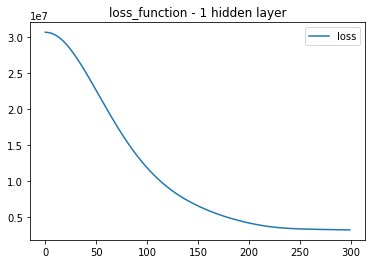

In [147]:
# Plot the train and test loss function
plt.plot(model_1.history["loss"])
plt.title("loss_function - 1 hidden layer")
plt.legend(["loss"])
plt.show()

In [148]:
# Define the model - deep neural net
number_input_features = 16
hidden_nodes_layer1 = 35
hidden_nodes_layer2 = 25

nn = Sequential()
# First hidden layer
nn.add(
    Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)
# Second hidden layer
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))
# Output layer
nn.add(Dense(units=1, activation="linear"))

In [149]:
# Compile model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# Fit the model
model_2 = nn.fit(X, y, validation_split=0.3, epochs=300)

Epoch 1/300
36/36 [==============================] - 0s 3ms/step - loss: 30684688.0000 - mse: 30684688.0000 - val_loss: 71352888.0000 - val_mse: 71352888.0000
Epoch 2/300
36/36 [==============================] - 0s 1ms/step - loss: 30660480.0000 - mse: 30660480.0000 - val_loss: 71301832.0000 - val_mse: 71301832.0000
Epoch 3/300
36/36 [==============================] - 0s 1ms/step - loss: 30601566.0000 - mse: 30601566.0000 - val_loss: 71170056.0000 - val_mse: 71170056.0000
Epoch 4/300
36/36 [==============================] - 0s 1ms/step - loss: 30466284.0000 - mse: 30466284.0000 - val_loss: 70890760.0000 - val_mse: 70890760.0000
Epoch 5/300
36/36 [==============================] - 0s 1ms/step - loss: 30199872.0000 - mse: 30199872.0000 - val_loss: 70392208.0000 - val_mse: 70392208.0000
Epoch 6/300
36/36 [==============================] - 0s 1ms/step - loss: 29763688.0000 - mse: 29763688.0000 - val_loss: 69558200.0000 - val_mse: 69558200.0000
Epoch 7/300
36/36 [===========================

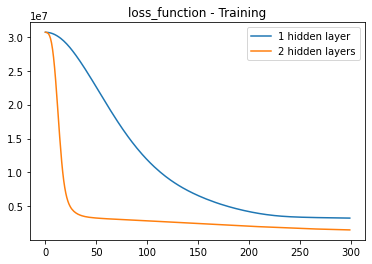

In [150]:
plt.plot(model_1.history["loss"])
plt.plot(model_2.history["loss"])
plt.title("loss_function - Training")
plt.legend(["1 hidden layer", "2 hidden layers"])
plt.show()

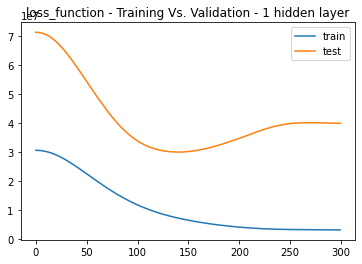

In [151]:
# Train vs test for shallow net
plt.plot(model_1.history["loss"])
plt.plot(model_1.history["val_loss"])
plt.title("loss_function - Training Vs. Validation - 1 hidden layer")
plt.legend(["train", "test"])
plt.show()

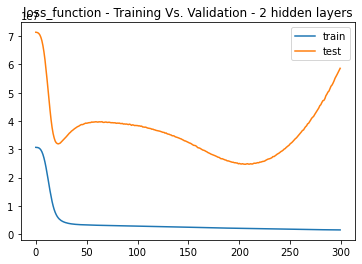

In [152]:
# Train vs test for deep net
plt.plot(model_2.history["loss"])
plt.plot(model_2.history["val_loss"])
plt.title("loss_function - Training Vs. Validation - 2 hidden layers")
plt.legend(["train", "test"])
plt.show()